# Task 1
### P1: Wan Muhammad Luqman Bin Wan Azinuddin (SW01081339)
### P2: Muhammad Aflahul Wafi Bin Amalik (SW01081772)
### Section: 01B

# Read Source Data

In [1]:
# import library
import pandas as pd

In [2]:
# read data - first 1000 rows
data = pd.read_csv("Reviews.csv", nrows=10000)

In [3]:
# check first 5 rows
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
# check no. of rows & columns
data.shape

(10000, 10)

# Remove Duplicates

In [5]:
# select Text column
data_t = data['Text']
data_t.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [6]:
# check no. of duplicates in Text column
data_t_duplicates = data_t.duplicated()
print(data_t_duplicates.sum())

487


In [7]:
# remove duplicates in Text column
data_rdup = data_t.drop_duplicates()
data_rdup.shape

(9513,)

In [8]:
# check any row
print(data_rdup[18])

Twizzlers, Strawberry my childhood favorite candy, made in Lancaster Pennsylvania by Y & S Candies, Inc. one of the oldest confectionery Firms in the United States, now a Subsidiary of the Hershey Company, the Company was established in 1845 as Young and Smylie, they also make Apple Licorice Twists, Green Color and Blue Raspberry Licorice Twists, I like them all<br /><br />I keep it in a dry cool place because is not recommended it to put it in the fridge. According to the Guinness Book of Records, the longest Licorice Twist ever made measured 1.200 Feet (370 M) and weighted 100 Pounds (45 Kg) and was made by Y & S Candies, Inc. This Record-Breaking Twist became a Guinness World Record on July 19, 1998. This Product is Kosher! Thank You


# Data Cleaning & Standardization

In [9]:
# import library
import re
import string

In [10]:
#.strip() is to remove white spaces after you do substitution
def get_cleaned_textdata(sentence):
    modified_sentence = re.sub(r'<.*?>',' ', sentence)
    modified_sentence = ''.join([i if i not in string.punctuation else ' ' for i in modified_sentence])
    modified_sentence = re.sub(r'\d+', ' ', modified_sentence)
    modified_sentence = re.sub(r'\s+', ' ', modified_sentence)
    modified_sentence = re.sub(r'also', ' ', modified_sentence)
    modified_sentence = modified_sentence.strip().lower()
    return modified_sentence

In [11]:
data_rdupclean = data_rdup.apply(get_cleaned_textdata)

In [12]:
# check result of data cleaning
print(data_rdup[18],"\n")
print(data_rdupclean[18])

Twizzlers, Strawberry my childhood favorite candy, made in Lancaster Pennsylvania by Y & S Candies, Inc. one of the oldest confectionery Firms in the United States, now a Subsidiary of the Hershey Company, the Company was established in 1845 as Young and Smylie, they also make Apple Licorice Twists, Green Color and Blue Raspberry Licorice Twists, I like them all<br /><br />I keep it in a dry cool place because is not recommended it to put it in the fridge. According to the Guinness Book of Records, the longest Licorice Twist ever made measured 1.200 Feet (370 M) and weighted 100 Pounds (45 Kg) and was made by Y & S Candies, Inc. This Record-Breaking Twist became a Guinness World Record on July 19, 1998. This Product is Kosher! Thank You 

twizzlers strawberry my childhood favorite candy made in lancaster pennsylvania by y s candies inc one of the oldest confectionery firms in the united states now a subsidiary of the hershey company the company was established in as young and smylie th

# Tokenization

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amirul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
from nltk.tokenize import word_tokenize

In [15]:
data_token = data_rdupclean.apply(word_tokenize)

In [16]:
# check result of tokenization
print(data_rdupclean[18],"\n")
print(data_token[18])

twizzlers strawberry my childhood favorite candy made in lancaster pennsylvania by y s candies inc one of the oldest confectionery firms in the united states now a subsidiary of the hershey company the company was established in as young and smylie they   make apple licorice twists green color and blue raspberry licorice twists i like them all i keep it in a dry cool place because is not recommended it to put it in the fridge according to the guinness book of records the longest licorice twist ever made measured feet m and weighted pounds kg and was made by y s candies inc this record breaking twist became a guinness world record on july this product is kosher thank you 

['twizzlers', 'strawberry', 'my', 'childhood', 'favorite', 'candy', 'made', 'in', 'lancaster', 'pennsylvania', 'by', 'y', 's', 'candies', 'inc', 'one', 'of', 'the', 'oldest', 'confectionery', 'firms', 'in', 'the', 'united', 'states', 'now', 'a', 'subsidiary', 'of', 'the', 'hershey', 'company', 'the', 'company', 'was',

# Remove Stopwords

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amirul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
stopwords = nltk.corpus.stopwords.words('english')

In [19]:
def remove_stopwords(text):
    output = []
    for i in text:
        if i not in stopwords:
            output.append(i)
    return output

In [20]:
data_xstopwords = data_token.apply(remove_stopwords)

In [21]:
# check result of stopwords removal
print(data_token[18],"\n")
print(data_xstopwords[18])

['twizzlers', 'strawberry', 'my', 'childhood', 'favorite', 'candy', 'made', 'in', 'lancaster', 'pennsylvania', 'by', 'y', 's', 'candies', 'inc', 'one', 'of', 'the', 'oldest', 'confectionery', 'firms', 'in', 'the', 'united', 'states', 'now', 'a', 'subsidiary', 'of', 'the', 'hershey', 'company', 'the', 'company', 'was', 'established', 'in', 'as', 'young', 'and', 'smylie', 'they', 'make', 'apple', 'licorice', 'twists', 'green', 'color', 'and', 'blue', 'raspberry', 'licorice', 'twists', 'i', 'like', 'them', 'all', 'i', 'keep', 'it', 'in', 'a', 'dry', 'cool', 'place', 'because', 'is', 'not', 'recommended', 'it', 'to', 'put', 'it', 'in', 'the', 'fridge', 'according', 'to', 'the', 'guinness', 'book', 'of', 'records', 'the', 'longest', 'licorice', 'twist', 'ever', 'made', 'measured', 'feet', 'm', 'and', 'weighted', 'pounds', 'kg', 'and', 'was', 'made', 'by', 'y', 's', 'candies', 'inc', 'this', 'record', 'breaking', 'twist', 'became', 'a', 'guinness', 'world', 'record', 'on', 'july', 'this', 'p

# Stemming

In [22]:
from nltk.stem.porter import PorterStemmer

In [23]:
porter_stemmer = PorterStemmer()

In [24]:
def porter_stemming(text):
    stem_text = []
    for word in text:
        stemmed_word = porter_stemmer.stem(word)
        stem_text.append(stemmed_word)
    return stem_text

In [25]:
data_porterstem = data_xstopwords.apply(porter_stemming)

In [26]:
# check result after Porter stemming
print(data_xstopwords[18], "\n\n")
print(data_porterstem[18])

['twizzlers', 'strawberry', 'childhood', 'favorite', 'candy', 'made', 'lancaster', 'pennsylvania', 'candies', 'inc', 'one', 'oldest', 'confectionery', 'firms', 'united', 'states', 'subsidiary', 'hershey', 'company', 'company', 'established', 'young', 'smylie', 'make', 'apple', 'licorice', 'twists', 'green', 'color', 'blue', 'raspberry', 'licorice', 'twists', 'like', 'keep', 'dry', 'cool', 'place', 'recommended', 'put', 'fridge', 'according', 'guinness', 'book', 'records', 'longest', 'licorice', 'twist', 'ever', 'made', 'measured', 'feet', 'weighted', 'pounds', 'kg', 'made', 'candies', 'inc', 'record', 'breaking', 'twist', 'became', 'guinness', 'world', 'record', 'july', 'product', 'kosher', 'thank'] 


['twizzler', 'strawberri', 'childhood', 'favorit', 'candi', 'made', 'lancast', 'pennsylvania', 'candi', 'inc', 'one', 'oldest', 'confectioneri', 'firm', 'unit', 'state', 'subsidiari', 'hershey', 'compani', 'compani', 'establish', 'young', 'smyli', 'make', 'appl', 'licoric', 'twist', 'gre

# Lemmatization

In [27]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amirul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
#importing the Lemmatizer function from nltk library
from nltk.stem import WordNetLemmatizer

In [29]:
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [30]:
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = []
    for word in text:
        lemmatized_word = wordnet_lemmatizer.lemmatize(word)
        lemm_text.append(lemmatized_word)
    return lemm_text

In [31]:
#applying the lemmatizer function to data_porterstem
data_lemmatized1 = data_porterstem.apply(lemmatizer)
data_lemmatized2 = data_xstopwords.apply(lemmatizer)


In [32]:
# check result after Lemmatization
print(data_porterstem[18], "\n\n")
print(data_lemmatized1[18], "\n\n")
print(data_xstopwords[18], "\n\n")
print(data_lemmatized2[18], "\n\n")

data['text_clean'] = data_lemmatized1
data

['twizzler', 'strawberri', 'childhood', 'favorit', 'candi', 'made', 'lancast', 'pennsylvania', 'candi', 'inc', 'one', 'oldest', 'confectioneri', 'firm', 'unit', 'state', 'subsidiari', 'hershey', 'compani', 'compani', 'establish', 'young', 'smyli', 'make', 'appl', 'licoric', 'twist', 'green', 'color', 'blue', 'raspberri', 'licoric', 'twist', 'like', 'keep', 'dri', 'cool', 'place', 'recommend', 'put', 'fridg', 'accord', 'guin', 'book', 'record', 'longest', 'licoric', 'twist', 'ever', 'made', 'measur', 'feet', 'weight', 'pound', 'kg', 'made', 'candi', 'inc', 'record', 'break', 'twist', 'becam', 'guin', 'world', 'record', 'juli', 'product', 'kosher', 'thank'] 


['twizzler', 'strawberri', 'childhood', 'favorit', 'candi', 'made', 'lancast', 'pennsylvania', 'candi', 'inc', 'one', 'oldest', 'confectioneri', 'firm', 'unit', 'state', 'subsidiari', 'hershey', 'compani', 'compani', 'establish', 'young', 'smyli', 'make', 'appl', 'licoric', 'twist', 'green', 'color', 'blue', 'raspberri', 'licoric',

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,text_clean
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,"[bought, sever, vital, can, dog, food, product..."
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,"[product, arriv, label, jumbo, salt, peanut, p..."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"[confect, around, centuri, light, pillowi, cit..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,"[look, secret, ingredi, robitussin, believ, fo..."
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,"[great, taffi, great, price, wide, assort, yum..."
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,B000P41A28,A3A63RACXR1XIL,"A. Boodhoo ""deaddodo""",10,15,1,1204502400,constipation,we switched from the advance similac to the or...,"[switch, advanc, similac, organ, product, thin..."
9996,9997,B000P41A28,A5VVRGL8JA7R,Adam,2,3,5,1306368000,Constipation Not A Problem if...,"Like the bad reviews say, the organic formula ...","[like, bad, review, say, organ, formula, const..."
9997,9998,B000P41A28,A2TGDTJ8YCU6PD,geena77,0,0,5,1347494400,Love this formula!,I wanted to solely breastfeed but was unable t...,"[want, sole, breastfe, unabl, keep, supplement..."
9998,9999,B000P41A28,AUV4GIZZE693O,"Susan Coe ""sueysis""",1,2,5,1203638400,very convenient,i love the fact that i can get this delieved t...,"[love, fact, get, deliev, hous, delievi, charg..."


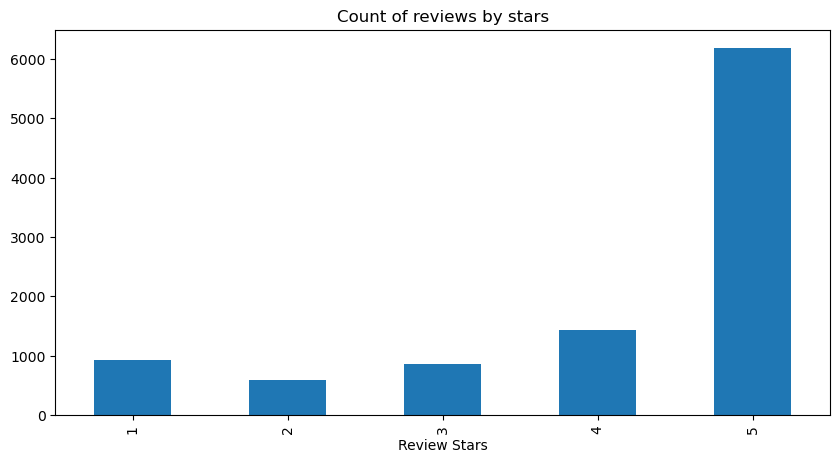

In [33]:
import matplotlib.pyplot as plt

ax = data['Score'].value_counts().sort_index()\
     .plot(kind='bar',
           title='Count of reviews by stars',
           figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

# Task 2
## Convert text data into numerical features

In [34]:
# import another library
import math
from collections import Counter

In [35]:
# create functions for calculating the tf, idf and tf-idf
def compute_tf(document):
    word_count = Counter(document)
    tf = {word: count/len(document) for word, count in word_count.items()}
    return tf

def compute_idf(documents):
    N = len(documents)
    idf = {}
    all_words = set(word for doc in documents for word in doc)
    for word in all_words:
        count = sum(1 for doc in documents if word in doc)
        idf[word] = math.log(N/count)
    return idf

def compute_tfidf(document, idf):
    tfidf = {}
    tf = compute_tf(document)
    for word, tf_value in tf.items():
        tfidf[word] = tf_value * idf[word]
    return tfidf

In [36]:
# Now compute the tf or the data that already lemmetised
tf_data1 = [compute_tf(doc) for doc in data_lemmatized1]
tf_data2 = [compute_tf(doc) for doc in data_lemmatized2]

In [37]:
# Create DataFrame for TF
tf_df1 = pd.DataFrame(tf_data1).fillna(0)
print("TF df1 Scores:")
print(tf_df1)

TF df1 Scores:
        bought     sever     vital       can       dog      food   product  \
0     0.043478  0.043478  0.043478  0.043478  0.043478  0.043478  0.130435   
1     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.111111   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
9508  0.000000  0.000000  0.000000  0.000000  0.000000  0.025000  0.050000   
9509  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9510  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.012987   
9511  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9512  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

         found      good   qualiti  ...  echelon

In [38]:
# Create DataFrame for TF
tf_df2 = pd.DataFrame(tf_data2).fillna(0)
print("TF df2 Scores:")
print(tf_df2)

TF df2 Scores:
        bought   several  vitality    canned       dog      food   product  \
0     0.043478  0.043478  0.043478  0.043478  0.043478  0.043478  0.130435   
1     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.111111   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
9508  0.000000  0.000000  0.000000  0.000000  0.000000  0.025000  0.050000   
9509  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9510  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.012987   
9511  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9512  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

         found      good   quality  ...  misinfo

In [39]:
# Compute IDF - the number of columns should be the same as you calculate in tf
idf1 = compute_idf(data_lemmatized1)
idf_df1 = pd.DataFrame([idf1]).fillna(0)
print("\nIDF df1 Scores:")
print(idf_df1)


IDF df1 Scores:
     tempt   citymad  seventeen    honest  shorthair   undefin    gensoy  \
0  6.02492  8.467267   9.160415  5.694679   9.160415  8.467267  9.160415   

    reagent    limead   chowder  ...  healther   florida      toy    hyster  \
0  8.467267  9.160415  5.634054  ...  9.160415  6.595465  6.02492  9.160415   

      unwil  goldilock    harvey   willpow       eat     embed  
0  9.160415   9.160415  9.160415  9.160415  2.155533  8.467267  

[1 rows x 12241 columns]


In [40]:
idf2 = compute_idf(data_lemmatized2)
idf_df2 = pd.DataFrame([idf2]).fillna(0)
print("\nIDF df2 Scores:")
print(idf_df2)


IDF df2 Scores:
   refreshment     tempt  rooibos  shortage  sensitve  economic     diary  \
0     7.080973  7.550977  7.77412  9.160415  9.160415  8.467267  9.160415   

   scientifically  patented  seventeen  ...  stunning  compostable  extremely  \
0        9.160415  8.467267   9.160415  ...  8.061802     9.160415   4.398241   

   bleaching  emergency    harvey  sweeting       eat  unusable  overshadows  
0   9.160415   6.327201  9.160415  9.160415  2.525781  8.467267     9.160415  

[1 rows x 15956 columns]


In [41]:
# Compute TF-IDF for each document
tfidf_data1 = [compute_tfidf(doc, idf1) for doc in data_lemmatized1]

# Create DataFrame for TF-IDF
tfidf_df1 = pd.DataFrame(tfidf_data1).fillna(0)
print("\nTF-IDF df1 Scores:")
print(tfidf_df1)


TF-IDF df1 Scores:
        bought     sever     vital       can       dog      food   product  \
0     0.110276  0.145621  0.307868  0.152825  0.127303  0.093837  0.198927   
1     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.169457   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
9508  0.000000  0.000000  0.000000  0.000000  0.000000  0.053956  0.076256   
9509  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9510  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.019807   
9511  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9512  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

         found      good   qualiti  ...  ec

In [42]:
# Compute TF-IDF for each document
tfidf_data2 = [compute_tfidf(doc, idf2) for doc in data_lemmatized2]

# Create DataFrame for TF-IDF
tfidf_df2 = pd.DataFrame(tfidf_data2).fillna(0)
print("\nTF-IDF df2 Scores:")
print(tfidf_df2)


TF-IDF df2 Scores:
        bought   several  vitality    canned       dog      food   product  \
0     0.110276  0.149286  0.350513  0.189408  0.127303  0.093837  0.199369   
1     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.169833   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
9508  0.000000  0.000000  0.000000  0.000000  0.000000  0.053956  0.076425   
9509  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9510  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.019851   
9511  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9512  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

         found      good   quality  ...  mi

# Task 3


MODEL SELECTION

In [53]:
data['Score'] = data['Score'].replace({1: 'negative', 2: 'negative', 3: 'neutral', 4: 'positive', 5: 'positive'})

In [58]:
stemmer = nltk.SnowballStemmer("english")
def preprocess(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text within square brackets
    text = re.sub(r'http\S+\s*\S+', '', text)  # Remove URLs starting with http
    text = re.sub(r'www\.\S+', '', text)  # Remove URLs starting with www
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\b\w*\d\w*\b', '', text)  # Remove words containing numbers
    text = ' '.join(word for word in text.split(' ') if word not in stopwords) #remove stopwords
    text = ' '.join(stemmer.stem(word) for word in text.split(' ')) #stemming
    return text

data['message_clean'] = data['Text'].apply(preprocess)


output_file_path = 'extracteddata.csv'
data.to_csv(output_file_path, index=False)

print("extracted data saved to:", output_file_path)
data.head(20)

extracted data saved to: extracteddata.csv


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,text_clean,message_clean
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,"[bought, sever, vital, can, dog, food, product...",bought sever vital can dog food product found ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,"[product, arriv, label, jumbo, salt, peanut, p...",product arriv label jumbo salt peanutsth peanu...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"[confect, around, centuri, light, pillowi, cit...",confect around centuri light pillowi citrus g...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,"[look, secret, ingredi, robitussin, believ, fo...",look secret ingredi robitussin believ found g...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...,"[great, taffi, great, price, wide, assort, yum...",great taffi great price wide assort yummi taf...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,positive,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,"[got, wild, hair, taffi, order, five, pound, b...",got wild hair taffi order five pound bag taffi...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,positive,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,"[saltwat, taffi, great, flavor, soft, chewi, c...",saltwat taffi great flavor soft chewi candi i...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,positive,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,"[taffi, good, soft, chewi, flavor, amaz, would...",taffi good soft chewi flavor amaz would def...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,positive,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,"[right, mostli, sprout, cat, eat, grass, love,...",right im most sprout cat eat grass love rotat ...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,positive,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,"[healthi, dog, food, good, digest, also, good,...",healthi dog food good digest also good small p...


In [55]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()

X = tfidf_vect.fit_transform(data['message_clean'])
y = data['Score']

In [48]:
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [49]:
# Naive Bayes
nb_clf = MultinomialNB().fit(X_train, y_train)

# SVM
svm_clf = SVC(kernel='linear').fit(X_train, y_train)

In [50]:
# Performance metrics comparison
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score  # Importing accuracy_score

# Naive Bayes
nb_predicted = nb_clf.predict(X_test)
nb_report = classification_report(y_test, nb_predicted)
# Calculate error rate for Naive Bayes
nb_error_rate = 1 - accuracy_score(y_test, nb_predicted)
nb_cm = confusion_matrix(y_test, nb_predicted)

# SVM
svm_predicted = svm_clf.predict(X_test)
svm_report = classification_report(y_test, svm_predicted)
# Calculate error rate for SVM
svm_error_rate = 1 - accuracy_score(y_test, svm_predicted)
svm_cm = confusion_matrix(y_test, svm_predicted)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
nb_cm

array([[   0,    0,  396],
       [   0,    0,  206],
       [   0,    0, 1898]], dtype=int64)

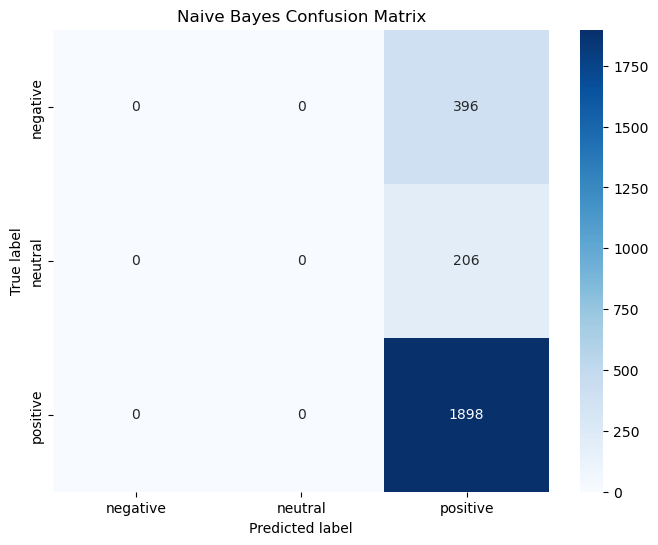

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       396
     neutral       0.00      0.00      0.00       206
    positive       0.76      1.00      0.86      1898

    accuracy                           0.76      2500
   macro avg       0.25      0.33      0.29      2500
weighted avg       0.58      0.76      0.66      2500


Naive Bayes Error Rate: 0.24


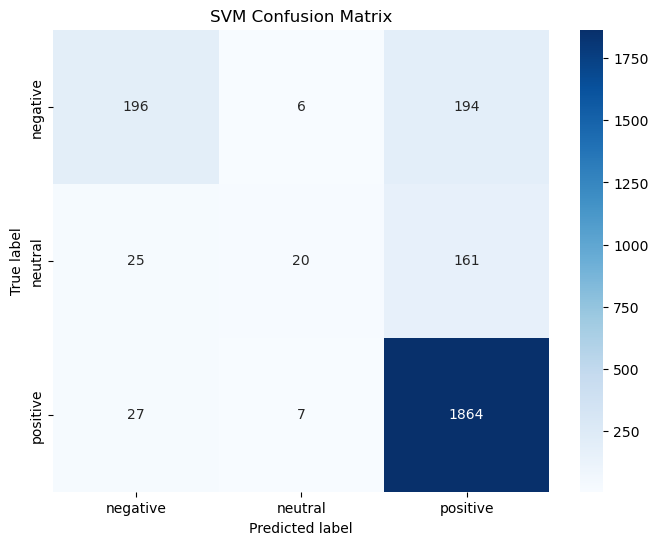


SVM Classifier Report:
              precision    recall  f1-score   support

    negative       0.79      0.49      0.61       396
     neutral       0.61      0.10      0.17       206
    positive       0.84      0.98      0.91      1898

    accuracy                           0.83      2500
   macro avg       0.75      0.52      0.56      2500
weighted avg       0.81      0.83      0.80      2500


SVM Error Rate: 0.17


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Plot confusion matrix for Naive Bayes
plot_confusion_matrix(nb_cm, classes=['negative', 'neutral','positive'], title='Naive Bayes Confusion Matrix')

print("Naive Bayes Classifier Report:")
print(nb_report)
print(f"\nNaive Bayes Error Rate: {nb_error_rate:.2f}")

# Plot confusion matrix for SVM
plot_confusion_matrix(svm_cm, classes=['negative','neutral', 'positive'], title='SVM Confusion Matrix')

print("\nSVM Classifier Report:")
print(svm_report)
print(f"\nSVM Error Rate: {svm_error_rate:.2f}")

# Task 5
## Strength and Weakness of Sentiment Classification (Naive Bayes)

### Strength Naive Bayes
### 1. Efficiency: Naive Bayes is highly efficient in terms of computational resources. It requires a relatively small amount of data to estimate the necessary parameters (probabilities), making it fast for both training and prediction.
### 2. Simplicity: The algorithm is straightforward to implement and understand. It works by applying Bayes' theorem, assuming independence between features.
### 3. Performance: Despite its simplicity, Naive Bayes can perform quite well, especially in binary classification tasks like sentiment analysis. It often competes well with more complex models, particularly when the dataset features are independent.

### Weakness Naive Bayes
### 1. Feature relevance: Naive Bayes treats all features as equally important, which is not always the case. Some features might be more indicative of sentiment than others, and the model does not have the capacity to learn feature relevance.
### 2. Data scarcity: Naive Bayes can suffer from a problem known as "zero-frequency," where if a categorical variable has a category in the test data set, which was not observed in the training data set, it will assign a zero probability and will be unable to make a prediction. This can be somewhat mitigated with techniques like Laplace smoothing.
### 3. Probability estimates: While Naive Bayes is good for classification, the probability estimates it provides are not always reliable, especially when the independence assumption does not hold. This can be problematic if precise probability outputs are required.

# SVM Strength

### 1. Versatile: SVM supports different kernel functions, allowing flexibility in modeling complex relationships in the data.

### 2. Control over regularization: SVM provides control over the regularization parameter, allowing users to fine-tune the model's complexity and prevent overfitting.

### 3. Well-Suited for Text Classification: SVMs are widely used in text classification tasks, such as sentiment analysis and document categorization, due to their ability to handle high-dimensional sparse data efficiently.

# SVM Weaknesses

### 1. Lack of interpretability: SVM models are not inherently interpretable, making it difficult to understand the rationale behind the model's predictions.

### 2. Computationally intensive: Training an SVM model can be computationally expensive, especially with large datasets.

# Scaling with Sample Size: SVM's training time and memory requirements scale poorly with the size of the dataset. As the number of samples increases, the training time and memory consumption also increase, limiting its scalability to very large datasets.